In [3]:
import pandas as pd


https://bonartm.github.io/data-librarian/

![Bild-Bootstraping](../images/bootstrapping_verfahren.png)


## Beispiel
Nehmen Sie an, dass die Stichprobe die folgenden n=7 Werte enthält:

In [4]:
# Stichprobe
x = pd.Series([21, 13,  8, 14, 10, 12,  5])
x.mean()

11.857142857142858

Eine simulierte Bootstrapping-Stichprobe erhalten Sie, indem Sie aus der vorhandenen Stichprobe genau n=7 Werte mit Zurücklegen **(replace=True)** zufällig auswählen:

In [5]:
x.sample(n=len(x), replace=True) 

3    14
0    21
0    21
0    21
1    13
4    10
0    21
dtype: int64

Wir erstellen eine Bootstrapping-Verteilung für den Stichproben-Mittelwert. Die Anzahl der Simulationen wird auf S=10000 festgelegt. Mit einer for Schleife wird die Simulation wiederholt. In jeder Simulation wird eine Bootstrapping-Stichprobe erstellt und deren Mittelwert berechnet.

In [6]:
x_means = []
S=1000
for i in range(S):
    x_mean = x.sample(n=len(x), replace=True).mean()
    x_means.append(x_mean)


Die Mittelwerte jeder Simulation werden in der Liste x_means abgespeichert. Die Liste enthält nun eine empirische Stichprobenverteilung des Mittelwerts. Nun können Sie sich die Verteilung des Stichproben-Mittelwertes beispielsweise in einem Histogramm ansehen:

<AxesSubplot:ylabel='Count'>

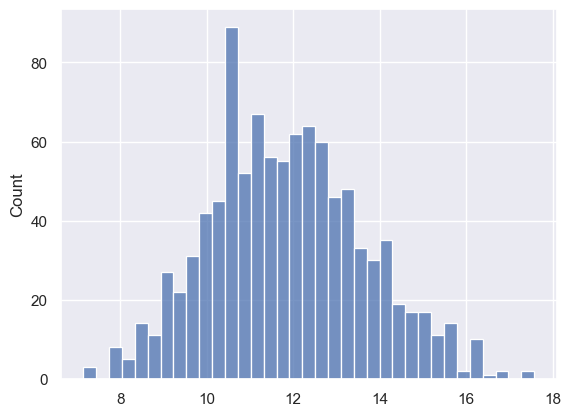

In [7]:
#matplotlib inline
import seaborn as sns
sns.set()
sns.histplot(x_means, kde=False, bins=35)

Wie viele Mittelwerte liegen zwischen 9 und 11?

In [8]:
x_means = pd.Series(x_means)
x_means.between(10,14).mean()

0.744


# KONFIDENZINTERVALLE UND SIGNIFIKANZ
![Bild-KONFIDENZINTERVALLE](../images/konfidenzintervalle.png)

Im vorherigen Beispiel haben Sie mit Hilfe des Bootstrapping-Verfahrens die Stichprobenverteilung geschätzt. Wenn die Stichprobenverteilung bekannt ist, können damit Aussagen über den tatsächlichen Parameter in der Population (im Bild mit μ bezeichnet) getroffen werden.

Eine häufig angewandte Methode sind Konfidenzintervalle (KI). Sie geben einen Bereich aus der Stichprobenverteilung des Schätzwertes an, der den wahren Wert in der Population mit hoher Wahrscheinlichkeit überdeckt. Die Wahrscheinlichkeit wird mit 1−α angegeben. Der Wert α wird Signifikanzniveau genannt und vor der Bestimmung des Intervalls festgelegt. Üblicherweise wird α=0.10, α=0.05, oder α=0.01 gesetzt.

Ein breites Konfidenzintervall zeigt auf, dass die Schätzwerte stark schwanken und dass der wahre Populationsparameter deswegen nur sehr ungenau bestimmt werden kann. Mit größerer Stichprobengröße verkleinert sich in der Regel der Stichprobenfehler und damit auch das Intervall: Es können präzisere Aussagen über die Population getroffen werden.

Mit einem niedrigeren Signifikanzniveau α kann sichergestellt werden, dass das KI den wahren Wert mit höherer Wahrscheinlichkeit überdeckt. Diese geringere Fehlertoleranz hat jedoch ein breiteres und damit weniger präzises Intervall zur Folge.

Das Konfidenzintervall kann aus der mit dem Bootstraping-Verfahren angenäherten Stichprobenverteilung geschätzt werden: Es entspricht genau den entsprechenden Quantilen der geschätzten Stichprobenverteilung: Soll beispielsweise ein 90%-KI zum Signifikanzniveau von α=0.10 erstellt werden, so lässt sich die untere Grenze aus der Verteilung als x¯α2=x¯0.05 ablesen. Die obere Grenze als x¯1−α2=x¯0.95. Somit ist sichergestellt, dass 90% aller mit dem Bootstrapping Verfahren ermittelter Stichprobenmittelwerte innerhalb dieses Intervalls liegen. Damit überdeckt das KI mit 90% Wahrscheinlichkeit den wahren Populationsparameter μ.

Mit dem Bootstrapping Verfahren können Sie nicht nur Konfidenzintervalle für den Mittelwert angeben, sondern auch für viele weitere Statistiken, wie den Median oder den Korrelationskoeffizienten zwischen zwei Variablen.

In [9]:
x_means = pd.Series(x_means)
alpha = 0.10
x_means.quantile((alpha/2,1-alpha/2))

0.05     9.0
0.95    15.0
dtype: float64